In [163]:
import pandas as pd
import matplotlib.pyplot as plt

from statsapi_parameters_script import DATA_FILE_LOCATION , LEAGUE_NAME_LOCATION, american_league_team_id_name,national_league_team_id_name
from datetime import datetime

In [164]:
TODAY_DATE_TIME_EXECUTION = datetime.today().strftime("%Y-%m-%d")
print(TODAY_DATE_TIME_EXECUTION)

2023-06-11


In [165]:
with open(LEAGUE_NAME_LOCATION, "r") as text_file:
    LEAGUE_NAME = text_file.readline().strip()
LEAGUE_NAME = "national_league"

In [166]:
TODAY_AL_BATTER_DATA_FILE_NAME = f"{DATA_FILE_LOCATION}{LEAGUE_NAME}_{TODAY_DATE_TIME_EXECUTION}_batter_stats_df.csv"

In [167]:
todays_data = pd.read_csv(TODAY_BATTER_DATA_FILE_NAME, index_col=0)

In [168]:
todays_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 572233 to 575929
Data columns (total 75 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   playername                                  146 non-null    object 
 1   team_id                                     146 non-null    int64  
 2   gamesPlayed                                 146 non-null    float64
 3   groundOuts                                  146 non-null    float64
 4   airOuts                                     146 non-null    float64
 5   runs                                        146 non-null    float64
 6   doubles                                     146 non-null    float64
 7   triples                                     146 non-null    float64
 8   homeRuns                                    146 non-null    float64
 9   strikeOuts                                  146 non-null    float64
 10  baseOn

In [169]:
todays_data.head()

,playername,team_id,gamesPlayed,groundOuts,airOuts,runs,doubles,triples,homeRuns,strikeOuts,...,normalized_baseOnBalls,baseOnBalls_z_score,totalBases_mean,totalBases_std,normalized_totalBases,totalBases_z_score,difstrikeOutsbaseOnBalls_mean,difstrikeOutsbaseOnBalls_std,normalized_difstrikeOutsbaseOnBalls,difstrikeOutsbaseOnBalls_z_score
572233,Christian Walker,109,60.0,50.0,76.0,36.0,13.0,0.0,12.0,47.0,...,113.977695,0.256900,75.280822,27.212255,139.477755,1.092125,25.054795,13.123698,103.772553,0.072023
682998,Corbin Carroll,109,3.0,49.0,55.0,45.0,16.0,1.0,13.0,49.0,...,141.115242,0.755669,75.280822,27.212255,162.059867,1.716843,25.054795,13.123698,91.798797,-0.156571
656896,Emmanuel Rivera,109,31.0,20.0,33.0,20.0,9.0,0.0,1.0,13.0,...,32.565056,-1.239406,75.280822,27.212255,63.761259,-1.002520,25.054795,13.123698,27.938764,-1.375740
446334,Evan Longoria,109,13.0,21.0,25.0,15.0,6.0,0.0,8.0,34.0,...,32.565056,-1.239406,75.280822,27.212255,70.403057,-0.818779,25.054795,13.123698,111.755057,0.224419
672515,Gabriel Moreno,109,51.0,53.0,30.0,12.0,8.0,0.0,2.0,35.0,...,59.702602,-0.740638,75.280822,27.212255,79.701574,-0.561542,25.054795,13.123698,95.790049,-0.080373


In [170]:
print(todays_data["gamesPlayed"].min())
print(todays_data["gamesPlayed"].max())

1.0
65.0


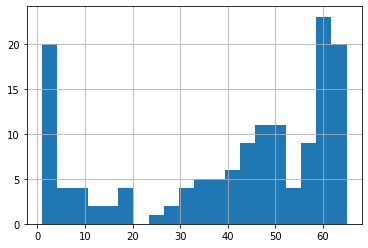

In [171]:
todays_data["gamesPlayed"].hist(bins = 20)
plt.show()

In [172]:
player_information_features = ["playername","team_id", "gamesPlayed","plateAppearances"]

In [173]:
plate_normalized_features = [col for col in todays_data.columns if 'perplateAppearance' in col]

In [174]:
plate_normalized_data = todays_data[player_information_features + plate_normalized_features]

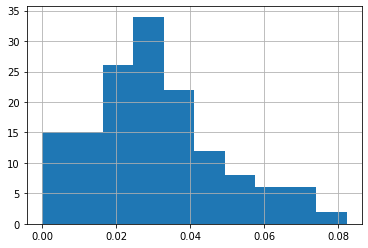

In [175]:
plate_normalized_data["homeRunsperplateAppearance"].hist()
plt.show()

In [176]:
team_averages = plate_normalized_data.groupby("team_id").mean()

In [177]:
team_averages

,gamesPlayed,plateAppearances,strikeOutsperplateAppearance,homeRunsperplateAppearance,hitsperplateAppearance,rbiperplateAppearance,baseOnBallsperplateAppearance,totalBasesperplateAppearance,difstrikeOutsbaseOnBallsperplateAppearance
team_id,,,,,,,,,
109,37.833333,177.583333,0.194781,0.030503,0.236480,0.131326,0.081543,0.387431,0.113238
112,18.000000,206.000000,0.226449,0.027807,0.224563,0.106864,0.092778,0.353028,0.133671
113,52.111111,202.111111,0.229020,0.019156,0.245295,0.115342,0.088507,0.374872,0.140513
115,39.000000,182.500000,0.230992,0.018806,0.237354,0.117790,0.074514,0.363264,0.156478
119,47.700000,205.600000,0.218009,0.045786,0.220367,0.141058,0.099017,0.414919,0.118992
120,45.777778,228.000000,0.192774,0.021510,0.233760,0.108514,0.070022,0.348560,0.122752
121,35.400000,195.300000,0.205214,0.031011,0.216900,0.116500,0.094135,0.357614,0.111079
134,37.100000,200.100000,0.213428,0.025129,0.219184,0.111466,0.096043,0.358837,0.117385
135,44.909091,208.000000,0.219388,0.028665,0.197529,0.108602,0.112964,0.333466,0.106423


In [178]:
if LEAGUE_NAME == "american_league":
    team_id_name = american_league_team_id_name()
elif LEAGUE_NAME == "national_league":
    team_id_name = national_league_team_id_name()

In [179]:
team_averages["team_name"] = None

In [180]:
for team_id, team_name in team_id_name.items():
    team_averages.loc[team_id, "team_name"] = team_name

In [181]:
team_averages.set_index("team_name").sort_values("hitsperplateAppearance", ascending = False)

,gamesPlayed,plateAppearances,strikeOutsperplateAppearance,homeRunsperplateAppearance,hitsperplateAppearance,rbiperplateAppearance,baseOnBallsperplateAppearance,totalBasesperplateAppearance,difstrikeOutsbaseOnBallsperplateAppearance
team_name,,,,,,,,,
Cincinnati Reds,52.111111,202.111111,0.229020,0.019156,0.245295,0.115342,0.088507,0.374872,0.140513
Colorado Rockies,39.000000,182.500000,0.230992,0.018806,0.237354,0.117790,0.074514,0.363264,0.156478
Atlanta Braves,49.777778,228.333333,0.219468,0.045312,0.236519,0.134724,0.089075,0.423697,0.130393
Arizona Diamondbacks,37.833333,177.583333,0.194781,0.030503,0.236480,0.131326,0.081543,0.387431,0.113238
Washington Nationals,45.777778,228.000000,0.192774,0.021510,0.233760,0.108514,0.070022,0.348560,0.122752
Philadelphia Phillies,42.000000,213.888889,0.250764,0.029351,0.233441,0.099754,0.083198,0.383259,0.167567
Miami Marlins,36.363636,180.000000,0.212134,0.022442,0.232216,0.100857,0.077271,0.350275,0.134863
San Francisco Giants,38.363636,174.909091,0.249312,0.035559,0.225119,0.124331,0.090206,0.382420,0.159106
Chicago Cubs,18.000000,206.000000,0.226449,0.027807,0.224563,0.106864,0.092778,0.353028,0.133671


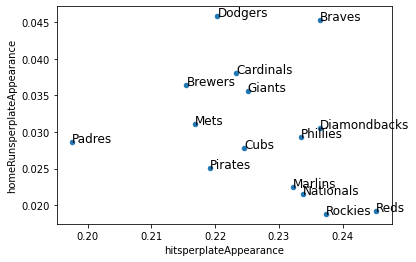

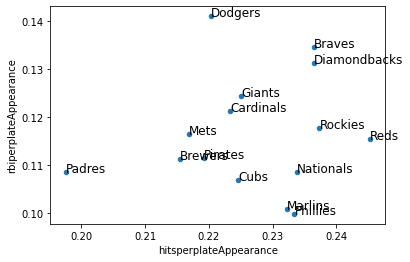

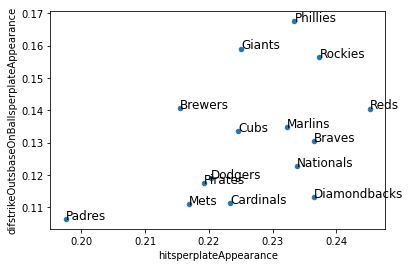

In [182]:
x_var = "hitsperplateAppearance"
y_var = "homeRunsperplateAppearance"

for y_var in ["homeRunsperplateAppearance", "rbiperplateAppearance", "difstrikeOutsbaseOnBallsperplateAppearance"]:
    fig, ax = plt.subplots()
    (
        team_averages.plot(
            ax=ax,  # type: ignore
            kind="scatter",
            x=x_var,
            y=y_var,
        )
    )
    for i, txt in enumerate(team_averages["team_name"].values):
        ax.annotate(
            txt.split(" ")[-1],
            (
                team_averages[x_var].values[i],
                team_averages[y_var].values[i],
            ),  # type: ignore
            fontsize=12,
        )

## Luis Arraez analysis

In [183]:
todays_data.columns

Index(['playername', 'team_id', 'gamesPlayed', 'groundOuts', 'airOuts', 'runs',
       'doubles', 'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls',
       'intentionalWalks', 'hits', 'hitByPitch', 'avg', 'atBats', 'obp', 'slg',
       'ops', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'plateAppearances', 'totalBases', 'rbi', 'leftOnBase', 'sacBunts',
       'sacFlies', 'groundOutsToAirouts', 'catchersInterference', 'babip',
       'difstrikeOutsbaseOnBalls', 'strikeOutsperplateAppearance',
       'homeRunsperplateAppearance', 'hitsperplateAppearance',
       'rbiperplateAppearance', 'baseOnBallsperplateAppearance',
       'totalBasesperplateAppearance',
       'difstrikeOutsbaseOnBallsperplateAppearance', 'avg_mean', 'avg_std',
       'normalized_avg', 'avg_z_score', 'babip_mean', 'babip_std',
       'normalized_babip', 'babip_z_score', 'obp_mean', 'obp_std',
       'normalized_obp', 'obp_z_score', 'ops_mean', 'ops_std',
       'normalized_ops', 'ops_z_score', 'hi

In [184]:
obp_analysis = (todays_data[player_information_features + ['obp', 'normalized_obp']]
.sort_values(by = ['normalized_obp'], ascending = False)
)

In [185]:
obp_analysis.head(+5)

,playername,team_id,gamesPlayed,plateAppearances,obp,normalized_obp
650333,Luis Arraez,146,60.0,248.0,0.452,138.764010
665742,Juan Soto,135,64.0,278.0,0.414,127.098009
664774,Wade Jr.,137,62.0,244.0,0.413,126.791009
518692,Freddie Freeman,119,65.0,299.0,0.411,126.177009
660670,Acuna Jr.,144,64.0,291.0,0.405,124.335009


In [186]:
normalized_columns = player_information_features + [col for col in todays_data.columns if 'normalized' in col]
print(normalized_columns)
normalized_analysis = todays_data[normalized_columns]

['playername', 'team_id', 'gamesPlayed', 'plateAppearances', 'normalized_avg', 'normalized_babip', 'normalized_obp', 'normalized_ops', 'normalized_hits', 'normalized_rbi', 'normalized_baseOnBalls', 'normalized_totalBases', 'normalized_difstrikeOutsbaseOnBalls']


In [187]:
## compute rank to check which other categories is Luiz Arraez leading